In [13]:
import numpy as np
import os
from PLOT_DIC import MN_dic,cat_dic,ele_label,periodic_table
import torch
def pearson(x, y):
    x_bar = torch.mean(x, -1,True)
    y_bar = torch.mean(y, -1,True)
    a = torch.sum((x - x_bar) * (y - y_bar), -1)
    a = torch.sum(a, -1)
    b_1 = torch.sum((x - x_bar)**2, -1)
    b_1 = torch.sum(b_1, -1)
    b_2 = torch.sum((y - y_bar)**2, -1)
    b_2 = torch.sum(b_2, -1)
    b = torch.sqrt(b_1) * torch.sqrt(b_2)
    x = a/b
    return x

In [4]:
pretrained_dic = torch.load("./ckpt.pt")
data = pretrained_dic['Embedding.embedding.weight'].cpu()[1:95]
# data = torch.rand(94,512)

In [5]:
pearson_matrix = torch.rand(94,94)
print(pearson_matrix.shape)

torch.Size([94, 94])


In [6]:
MN2Atom = {v:k for k,v in MN_dic.items()}
periodic_dic = {periodic_table[index]:index for index in range(94)} # atom2index

In [7]:
periodic_dic[MN2Atom[1]]    # MN => atom => periodic_index 

9

In [14]:
for i in range(94):
    for j in range(94):
        index1,index2 = periodic_dic[MN2Atom[i]],periodic_dic[MN2Atom[j]]
        pearson_matrix[i][j] = abs(pearson(data[index1],data[index2]))

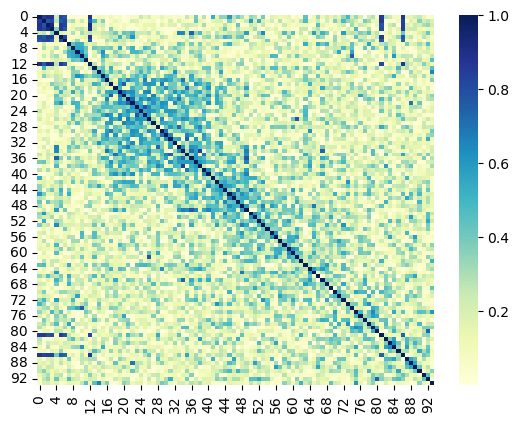

In [19]:
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
# sns.heatmap(pearson_matrix)
# my_colormap = LinearSegmentedColormap.from_list("", ["dodgerblue", "orangered"])
# my_colormap = LinearSegmentedColormap.from_list("", ["dodgerblue", "ivory","orangered"])
# my_colormap = LinearSegmentedColormap.from_list("", ["RdBu","RdBu_r"])

sns.heatmap(pearson_matrix,cmap="YlGnBu")
plt.savefig('correlation_matrix.png', dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>